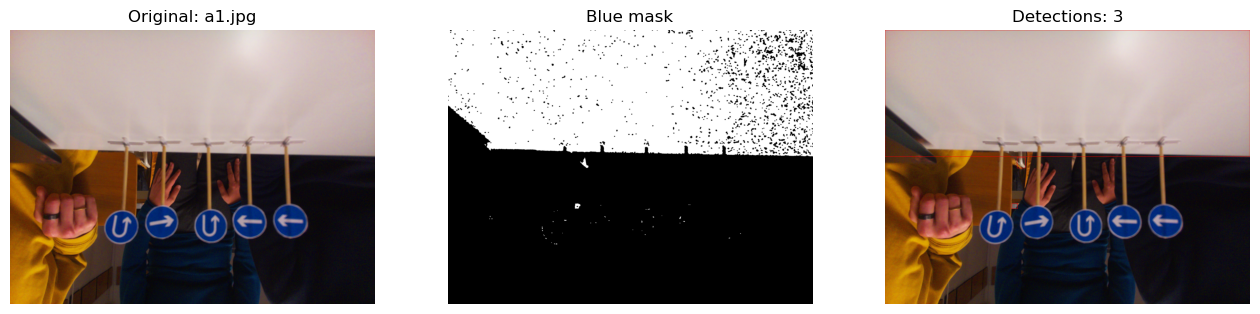

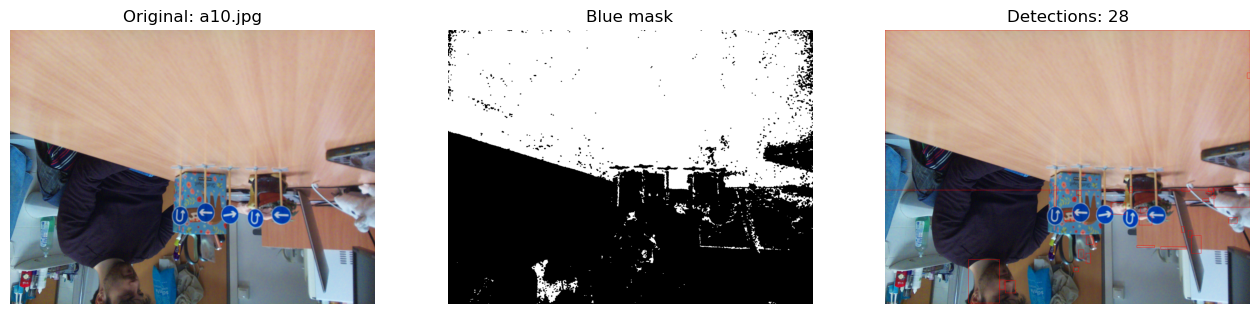

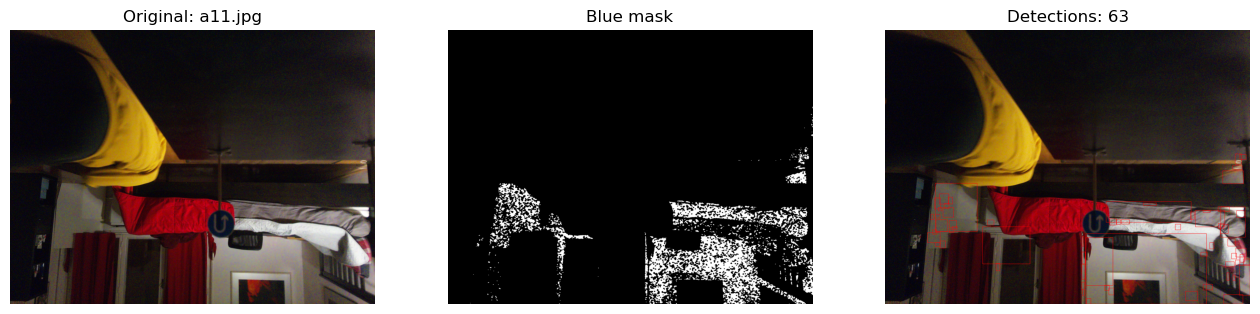

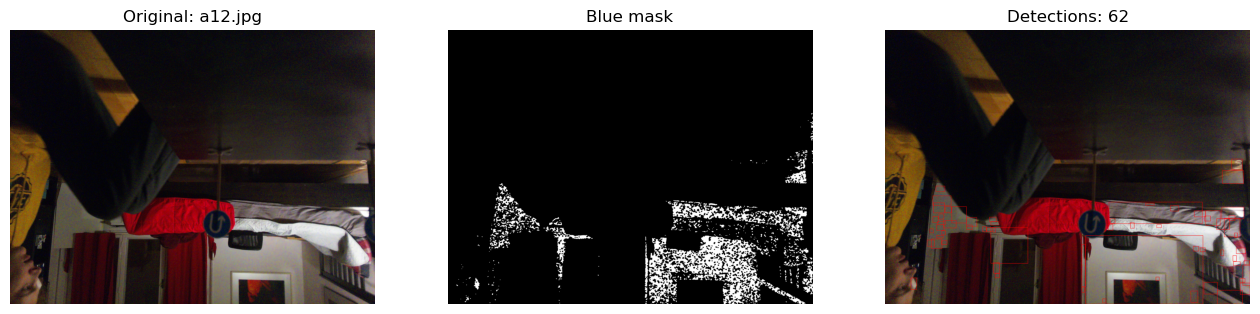

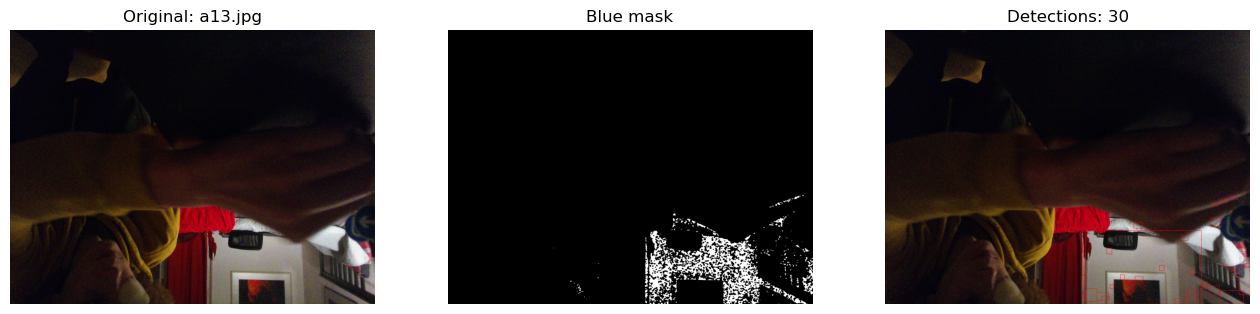

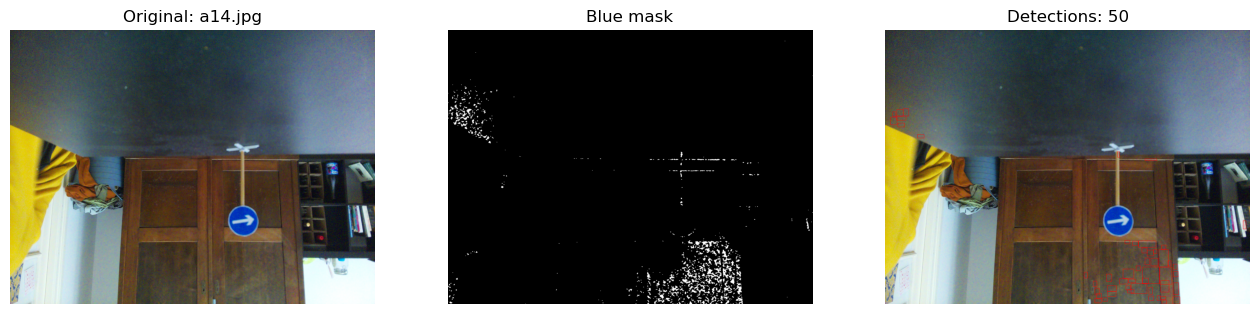

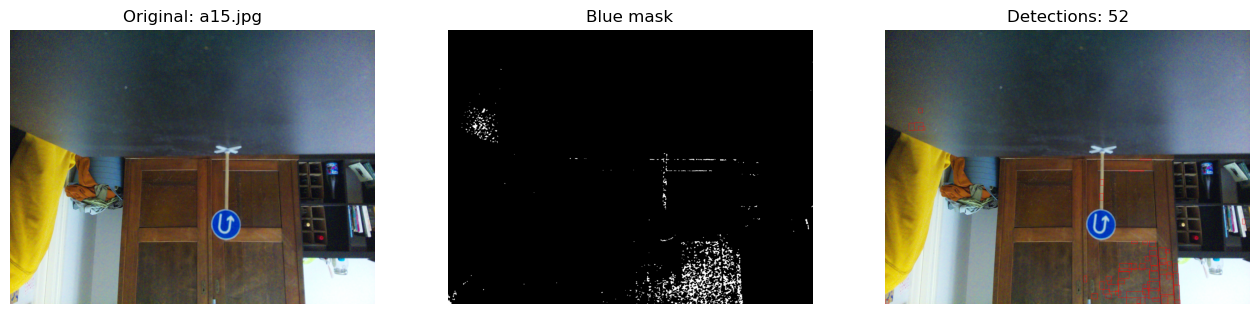

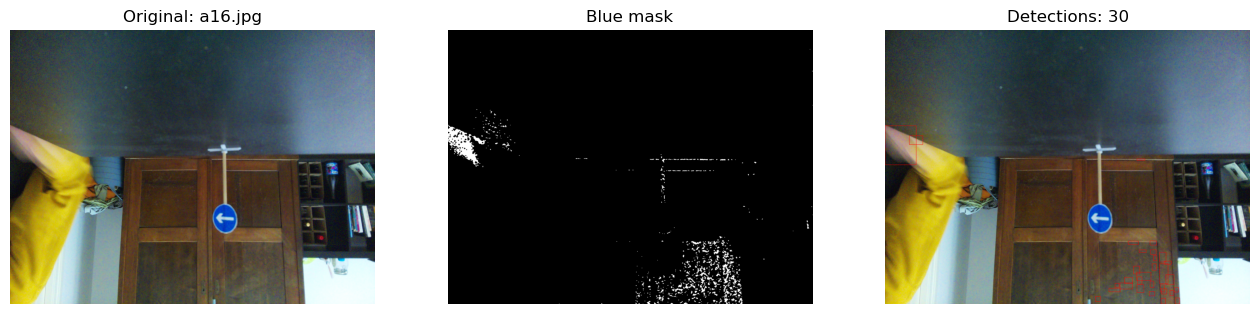

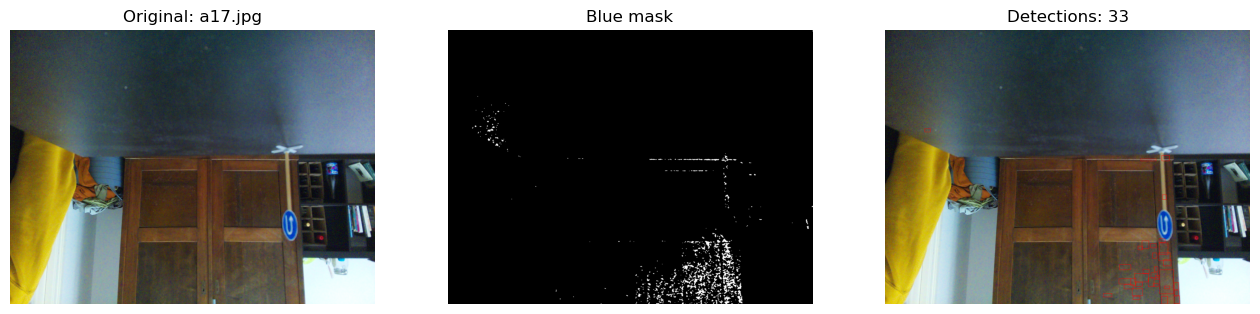

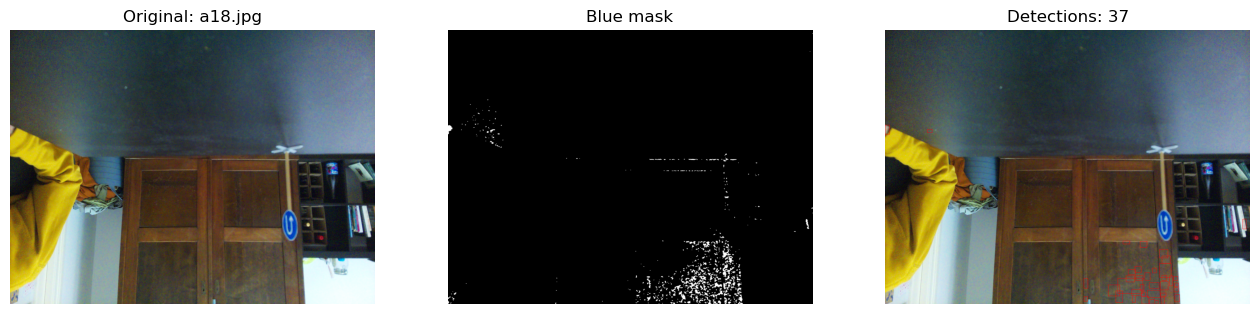

KeyboardInterrupt: 

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

data_dir = "data"
image_files = [f for f in os.listdir(data_dir) if f.lower().endswith(".jpg")]

# HSV blue range
lower_blue = np.array([90, 60, 90])
upper_blue = np.array([140, 255, 255])
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

for img_file in image_files:
    img_path = os.path.join(data_dir, img_file)
    img = cv2.imread(img_path)

    if img is None:
        print(f"Could not read image: {img_path}")
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert to HSV and create mask
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Morphological clean-up
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)

    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    det_img = img_rgb.copy()
    boxes = []

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area < 500:
            continue
        x, y, w, h = cv2.boundingRect(cnt)
        boxes.append((x, y, w, h, area))
        cv2.rectangle(det_img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Display results
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title(f"Original: {img_file}")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap="gray")
    plt.title("Blue mask")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(det_img)
    plt.title(f"Detections: {len(boxes)}")
    plt.axis("off")

    plt.show()

In [ ]:
import cv2
import numpy as np

# Load image
img = cv2.imread("data/a1.jpg")
if img is None:
    raise FileNotFoundError("Image not found")


def pick_pixel(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:  # left click
        sample_bgr = img[y, x].reshape(1, 1, 3)
        sample_hsv = cv2.cvtColor(sample_bgr, cv2.COLOR_BGR2HSV)[0, 0]
        print(f"Picked pixel at ({x},{y}) - HSV: {sample_hsv}")
        param["hsv"] = sample_hsv


cv2.namedWindow("Original")
data = {"hsv": None}
cv2.setMouseCallback("Original", pick_pixel, data)

while True:
    cv2.imshow("Original", img)
    key = cv2.waitKey(1) & 0xFF
    if key == 27:  # ESC to quit
        break

cv2.destroyAllWindows()

if data["hsv"] is not None:
    sample_hsv = data["hsv"]

    # Define tolerance
    h_tol = 10
    s_tol = 60
    v_tol = 60

    lower_blue = np.array([max(sample_hsv[0] - h_tol, 0), max(sample_hsv[1] - s_tol, 0), max(sample_hsv[2] - v_tol, 0)])
    upper_blue = np.array([min(sample_hsv[0] + h_tol, 179), min(sample_hsv[1] + s_tol, 255), min(sample_hsv[2] + v_tol, 255)])

    # Create mask
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    cv2.imshow("Mask", mask)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

# Load image
img = cv2.imread("data/a1.jpg")
if img is None:
    raise FileNotFoundError("Image not found")

# Resize to fit screen
screen_width = 1280
screen_height = 720
h, w = img.shape[:2]
scale = min(screen_width / w, screen_height / h)
img_resized = cv2.resize(img, (int(w * scale), int(h * scale)))

picked_hsv = None


def pick_pixel(event, x, y, flags, param):
    global picked_hsv
    if event == cv2.EVENT_LBUTTONDOWN:
        # Map coordinates back to original image
        orig_x = int(x / scale)
        orig_y = int(y / scale)
        sample_bgr = img[orig_y, orig_x].reshape(1, 1, 3)
        picked_hsv = cv2.cvtColor(sample_bgr, cv2.COLOR_BGR2HSV)[0, 0]
        print(f"Picked pixel at ({orig_x},{orig_y}) - HSV: {picked_hsv}")


cv2.namedWindow("Original")
cv2.setMouseCallback("Original", pick_pixel)

while True:
    cv2.imshow("Original", img_resized)
    if cv2.waitKey(1) & 0xFF == 27:  # ESC to quit
        break

cv2.destroyAllWindows()

if picked_hsv is not None:
    print("You picked HSV:", picked_hsv)
    # You can now use the same tolerance logic as before to create mask

Picked pixel at (1895,1759) - HSV: [108 255 111]
You picked HSV: [108 255 111]
You picked HSV: [108 255 111]


In [ ]:
import cv2
import numpy as np

# Picked HSV from your previous click
sample_hsv = np.array([108, 255, 111])

# Increase tolerance for robustness
h_tol = 15
s_tol = 100
v_tol = 100

lower_blue = np.array([max(sample_hsv[0] - h_tol, 0), max(sample_hsv[1] - s_tol, 0), max(sample_hsv[2] - v_tol, 0)])
upper_blue = np.array([min(sample_hsv[0] + h_tol, 179), min(sample_hsv[1] + s_tol, 255), min(sample_hsv[2] + v_tol, 255)])

print("Lower HSV:", lower_blue)
print("Upper HSV:", upper_blue)

# Load and resize image for display
img = cv2.imread("data/a1.jpg")
scale = 0.25  # show 25% of original
img_small = cv2.resize(img, (0, 0), fx=scale, fy=scale)

# Convert to HSV and create mask
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Optional morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)

# Resize mask for display
mask_small = cv2.resize(mask, (0, 0), fx=scale, fy=scale)

cv2.imshow("Image", img_small)
cv2.imshow("Mask", mask_small)
cv2.waitKey(0)
cv2.destroyAllWindows()

Lower HSV: [ 93 155  11]
Upper HSV: [123 255 211]
